In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from openpyxl import load_workbook
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

# **Data preprocessing**

In [ ]:
# Read the data from an Excel file into a Pandas DataFrame
uni_data = pd.read_excel('Admission_Predict.xlsx')

In [ ]:
uni_data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Scholarship,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1,0.92
1,2,324,107,4,4.0,4.5,8.87,0,1,0.76
2,3,316,104,3,3.0,3.5,8.00,0,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0,0.65


In [ ]:
#Looking if there are any null values
uni_data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Scholarship          0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
uni_data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Scholarship,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.312500,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.464093,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,0.000000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,1.000000,0.970000


In [ ]:
uni_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Scholarship        400 non-null    int64  
 8   Research           400 non-null    int64  
 9   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 31.4 KB


In [ ]:
print('Shape of the data: ')
uni_data.shape

Shape of the data: 


(400, 10)

In [ ]:
#Finding out covariance
uni_data.cov()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Scholarship,Research,Chance of Admit
Serial No.,13366.666667,-129.369674,-103.807018,-22.472431,-19.432331,-9.164160,-3.144373,0.023810,-3.637845,0.698020
GRE Score,-129.369674,131.644555,58.216967,8.778791,7.079699,5.747726,5.699742,3.594142,3.318690,1.313271
TOEFL Score,-103.807018,58.216967,36.838997,4.828697,4.021053,3.095965,2.998337,1.874060,1.481729,0.685179
University Rating,-22.472431,8.778791,4.828697,1.308114,0.845865,0.678352,0.509117,0.338503,0.255232,0.116009
SOP,-19.432331,7.079699,4.021053,0.845865,1.013784,0.660025,0.431183,0.265664,0.222807,0.097028
LOR,-9.164160,5.747726,3.095965,0.678352,0.660025,0.807262,0.359084,0.221648,0.177701,0.085834
CGPA,-3.144373,5.699742,2.998337,0.509117,0.431183,0.359084,0.355594,0.199059,0.155026,0.074265
Scholarship,0.023810,3.594142,1.874060,0.338503,0.265664,0.221648,0.199059,0.215382,0.119204,0.049439
Research,-3.637845,3.318690,1.481729,0.255232,0.222807,0.177701,0.155026,0.119204,0.248365,0.039317
Chance of Admit,0.698020,1.313271,0.685179,0.116009,0.097028,0.085834,0.074265,0.049439,0.039317,0.020337


In [ ]:
#Finding out correlation
uni_data.corr()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Scholarship,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,0.000444,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.674977,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.665311,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.637726,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.568532,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.531559,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.719281,0.521654,0.873289
Scholarship,0.000444,0.674977,0.665311,0.637726,0.568532,0.531559,0.719281,1.000000,0.515397,0.746997
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,0.515397,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.746997,0.553202,1.000000


In [ ]:
uni_data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Scholarship,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,1,0.92
1,2,324,107,4,4.0,4.5,8.87,0,1,0.76
2,3,316,104,3,3.0,3.5,8.00,0,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0,0.65
...,...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0,0.67


# **Data visualization**



<Axes: xlabel='GRE Score', ylabel='Chance of Admit '>

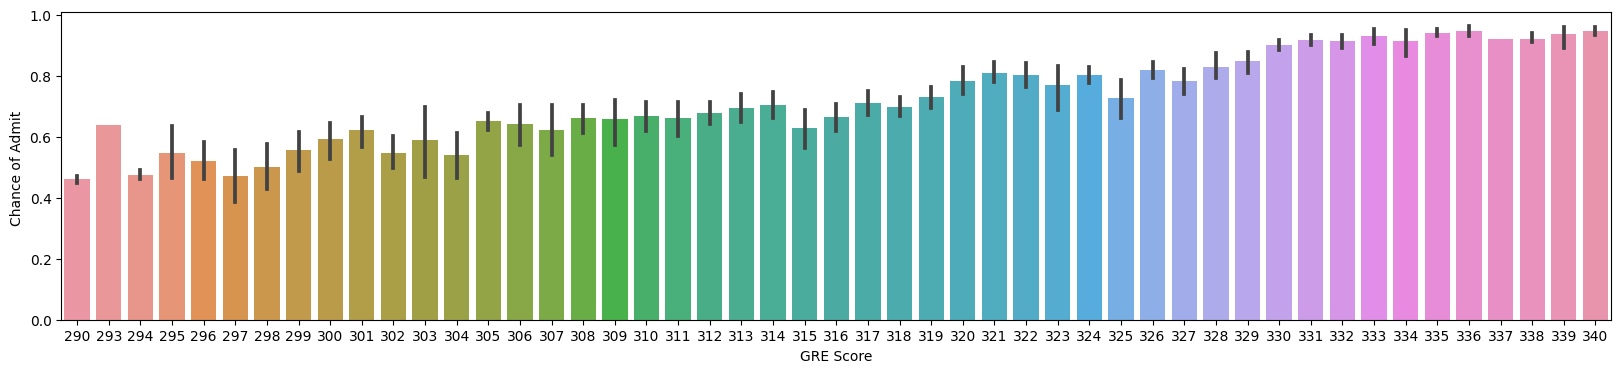

In [ ]:
#Plot GRE score against chance of admit
plt.subplots(figsize=(20,4))
sns.barplot(x="GRE Score", y="Chance of Admit ", data = uni_data) 

<Axes: xlabel='TOEFL Score', ylabel='Chance of Admit '>

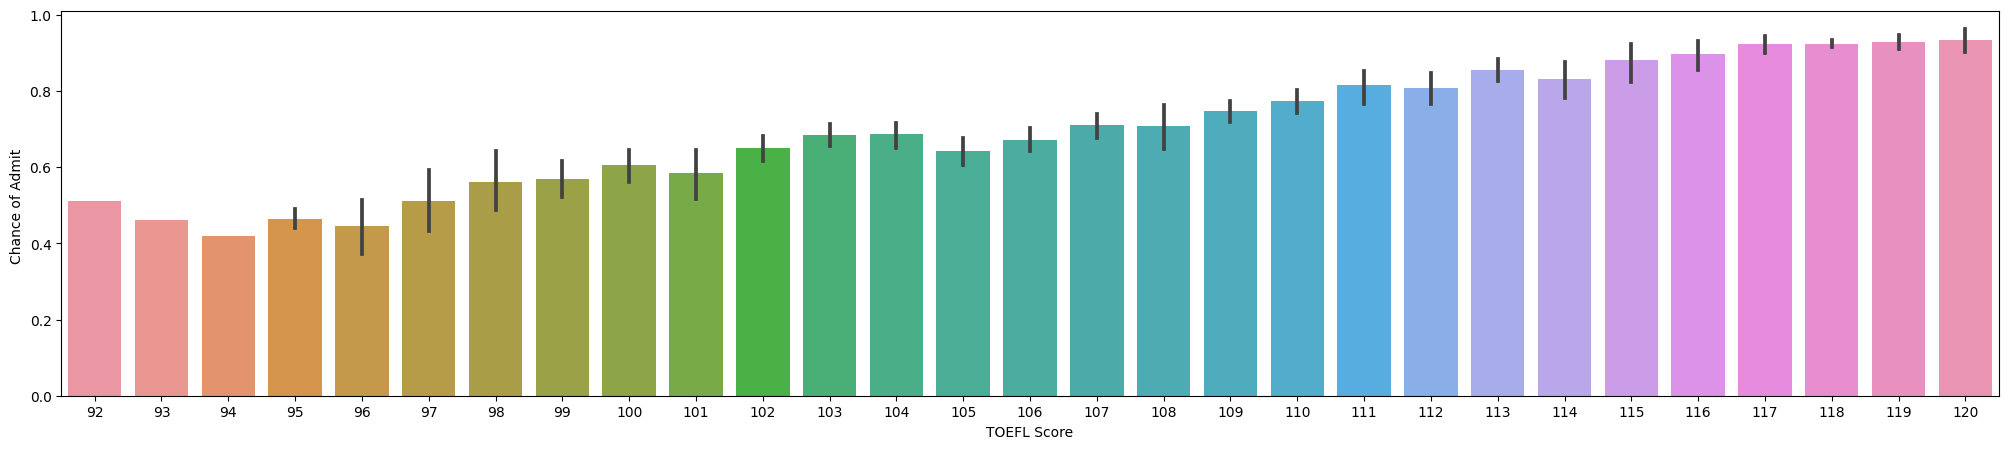

In [ ]:
#Plot TOEFL score against chance of admit

plt.subplots(figsize=(25,5))
sns.barplot(x="TOEFL Score", y="Chance of Admit ", data = uni_data)

<Axes: xlabel='SOP', ylabel='Chance of Admit '>

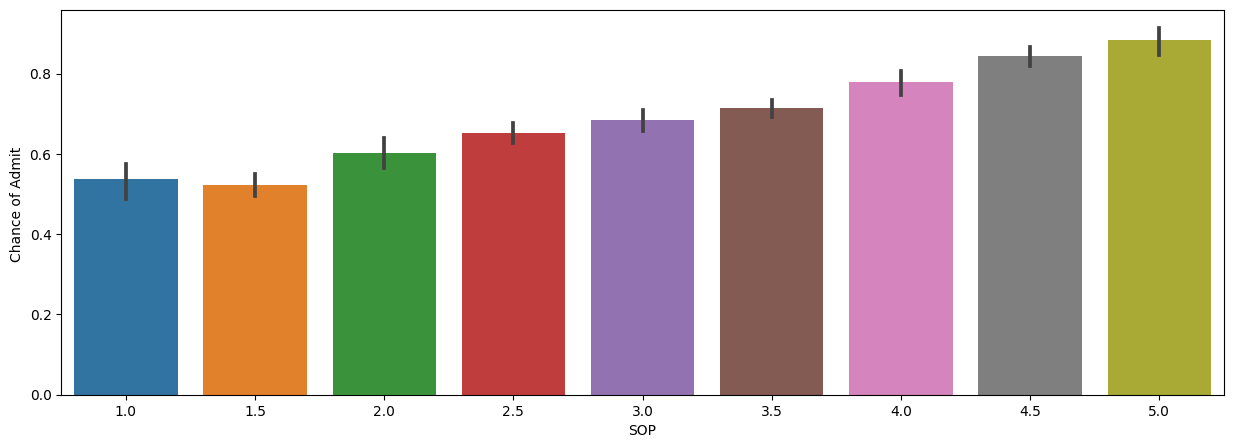

In [ ]:
#Plot SOP against chance of admit

plt.subplots(figsize=(15,5))
sns.barplot(x="SOP",y="Chance of Admit ", data = uni_data)

<Axes: xlabel='University Rating', ylabel='Chance of Admit '>

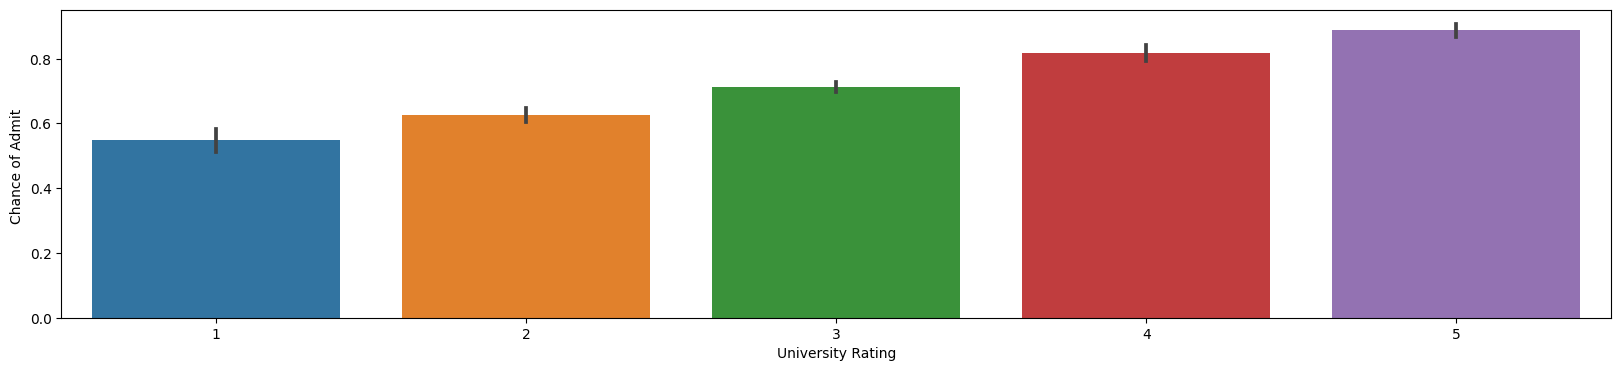

In [ ]:
#Plot University Rating against chance of admit

plt.subplots(figsize=(20,4))
sns.barplot(x="University Rating", y="Chance of Admit ",data=uni_data)

<Axes: xlabel='CGPA', ylabel='Chance of Admit '>

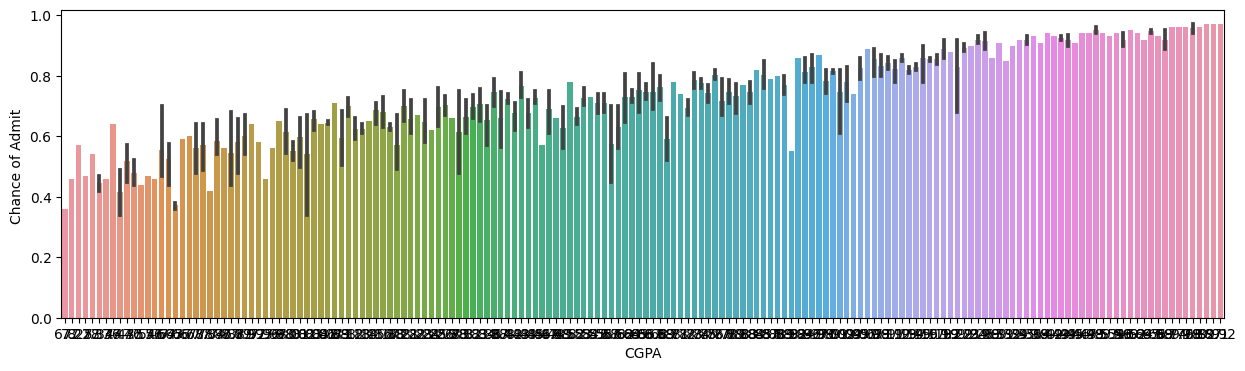

In [ ]:
#Plot CGPA against chance of admit

plt.subplots(figsize=(15,4))
sns.barplot(x="CGPA",y="Chance of Admit ", data=uni_data)

<Axes: xlabel='Research', ylabel='Chance of Admit '>

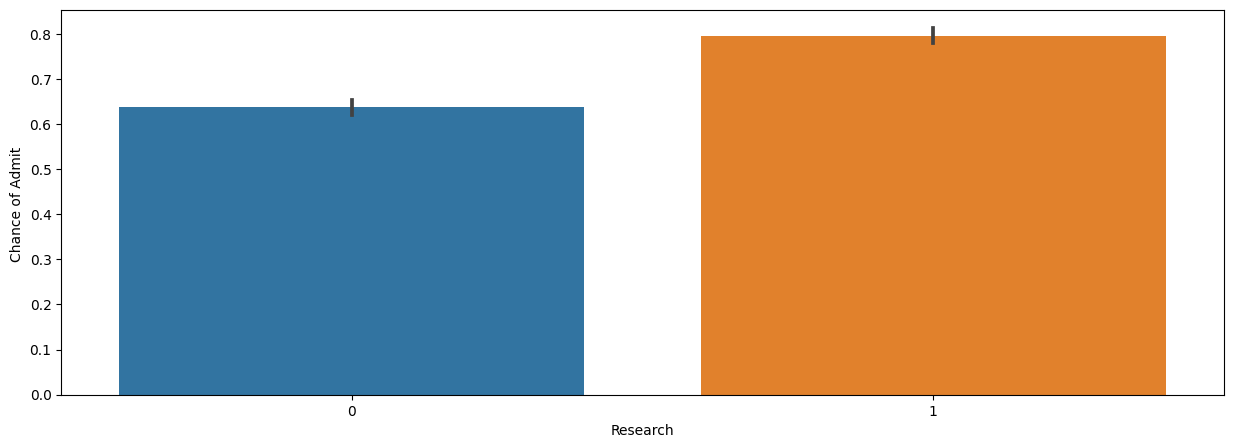

In [ ]:
#Plot Research against chance of admit

plt.subplots(figsize=(15,5))
sns.barplot(x="Research",y="Chance of Admit ",data=uni_data)

<Axes: xlabel='Scholarship', ylabel='Chance of Admit '>

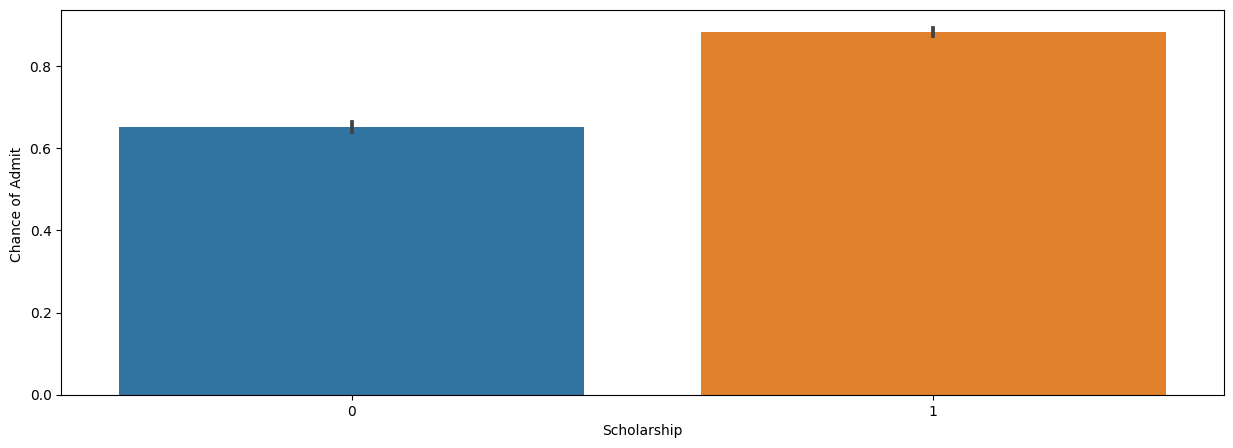

In [ ]:
#Plot Scholarship against chance of admit

plt.subplots(figsize=(15,5))
sns.barplot(x="Scholarship",y="Chance of Admit ",data=uni_data)

# **Random Forest**

1. Data Preparation 

2. Model Definition

3. Model Training

4. Model Evaluation

5. Confusion Matrix




In [ ]:
X = uni_data.iloc[:,1:8] #independent features
y = uni_data["Chance of Admit "]

In [ ]:
print(X.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Scholarship
0        337          118                  4  4.5   4.5  9.65            1
1        324          107                  4  4.0   4.5  8.87            0
2        316          104                  3  3.0   3.5  8.00            0
3        322          110                  3  3.5   2.5  8.67            1
4        314          103                  2  2.0   3.0  8.21            0


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .2,random_state = 1)

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42) # Train the model on training data
rf.fit(X_train, y_train);

In [ ]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.05 degrees.


In [ ]:
#Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 91.88 %.


In [ ]:
#view predicted chance of admit
pred_chance_of_admit = pd.DataFrame({ 'Predicted': predictions}) 
print(pred_chance_of_admit)

    Predicted
0     0.74035
1     0.67041
2     0.76705
3     0.80623
4     0.84363
..        ...
75    0.48449
76    0.67404
77    0.63874
78    0.70880
79    0.64370

[80 rows x 1 columns]


In [ ]:
#compare actual chance of admit to predicted chance of admit
compare_chance_of_admit = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}) 
print(compare_chance_of_admit)

     Actual  Predicted
398    0.67    0.74035
125    0.64    0.67041
328    0.80    0.76705
339    0.81    0.80623
172    0.86    0.84363
..      ...        ...
347    0.42    0.48449
41     0.49    0.67404
180    0.71    0.63874
132    0.71    0.70880
224    0.67    0.64370

[80 rows x 2 columns]


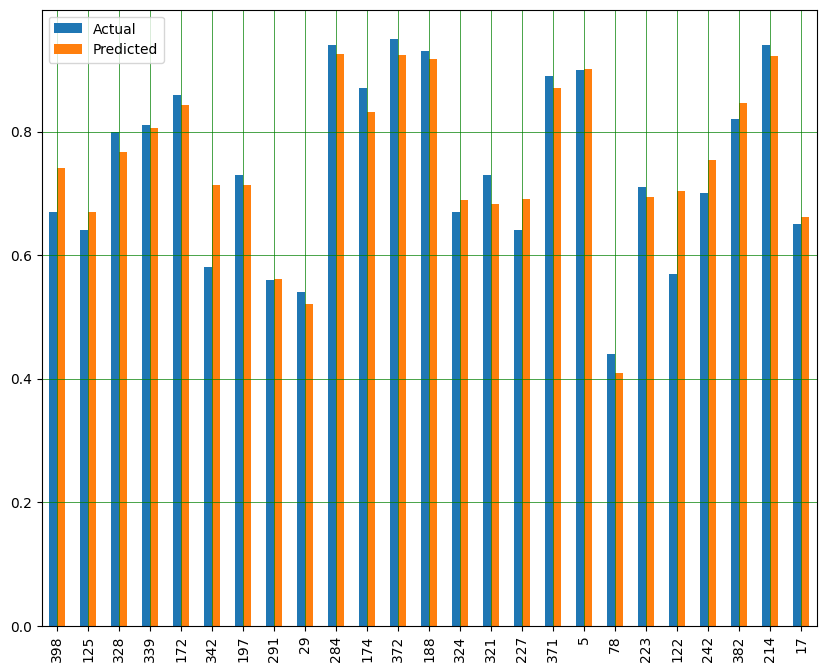

In [ ]:
#using bar plot to compare actual chance of admit and predicted chance of admit
Admission_Predict = compare_chance_of_admit.head(25) 
Admission_Predict.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green') 
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black') 
plt.savefig('actual_and_predicted_chance_of_admit.png')

In [ ]:
cy_train=[1 if chance > 0.82 else 0 for chance in y_train] 
cy_train=np.array(cy_train)
cy_test=[1 if chance > 0.82 else 0 for chance in y_test] 
cy_test=np.array(cy_test)

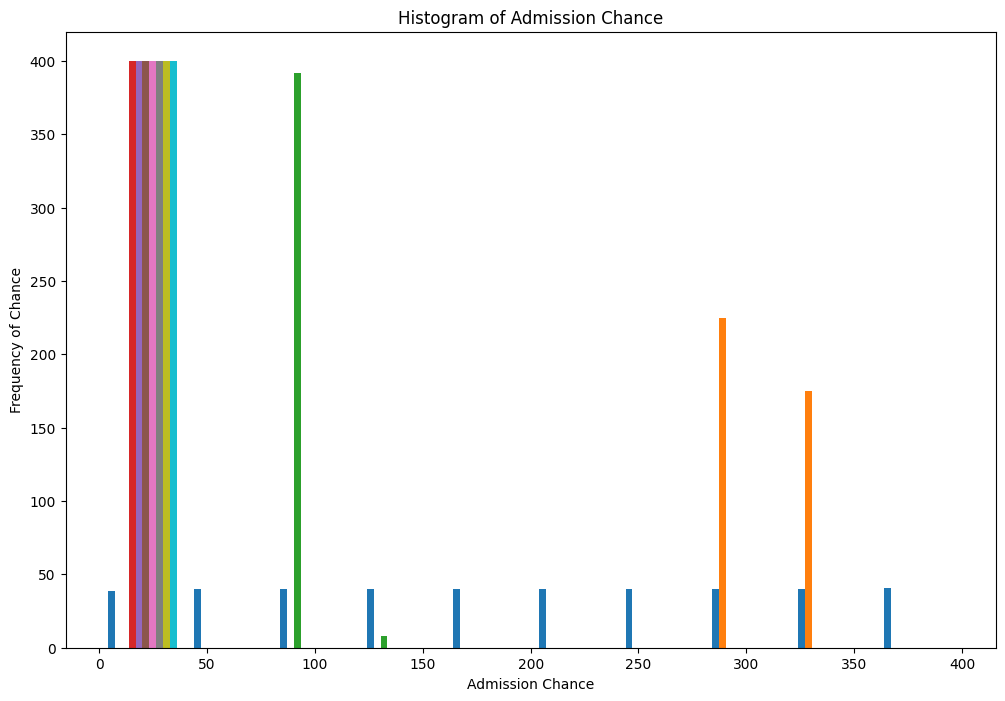

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.hist(uni_data)
plt.title('Histogram of Admission Chance')
plt.xlabel("Admission Chance")
plt.ylabel("Frequency of Chance")
plt.show()

# **Decision Tree model**

1. Splitting the Dataset

2. Train-Test Split 

3. Model Definition

4. Hyperparameter Tuning 

5. Model Training and Evaluation 

6. Model Performance

7. Mean Absolute Percentage Error (MAPE)

8. Accuracy
 

In [ ]:
#Splitting the dataset into dependent and independent features
X=uni_data.iloc[:,1:8] #independent features
Y=uni_data["Chance of Admit "] #dependent variable

In [ ]:
print(X.head())

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Scholarship
0        337          118                  4  4.5   4.5  9.65            1
1        324          107                  4  4.0   4.5  8.87            0
2        316          104                  3  3.0   3.5  8.00            0
3        322          110                  3  3.5   2.5  8.67            1
4        314          103                  2  2.0   3.0  8.21            0


In [ ]:
#Decision Tree

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=.60,random_state=1)

In [ ]:
reg=DecisionTreeRegressor()
param_grid= {'max_depth':[3,4,5,6], 
             'min_samples_split':[2,3,4,5,6,7,8],
             'splitter':['best','random'],
             'min_samples_leaf':[1,2,3,4],
             'criterion': ['squared_error','friedman_mse','poisson']}

In [ ]:
cv_model=GridSearchCV(reg,param_grid)
cv_model.fit(X_train,Y_train)
cv_model.best_params_

{'criterion': 'squared_error',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'splitter': 'best'}

In [ ]:
tree_model= DecisionTreeRegressor(max_depth=3,min_samples_split=2,min_samples_leaf=2,splitter="best")
tree_model.fit(X_train,Y_train)


DecisionTreeRegressor(max_depth=3, min_samples_leaf=2)

In [ ]:
#make sure we have a good prediciton error
print(tree_model.score(X_train,Y_train))
print(tree_model.score(X_test,Y_test))

0.8162267984525395
0.7491439381201355


In [ ]:

Y_pred= tree_model.predict(X_test)
mape=metrics.mean_absolute_percentage_error(Y_test,Y_pred)


In [ ]:
print(mape)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape) 
print('Accuracy:', round(accuracy, 2), '%.')

0.09181778963230611
Accuracy: 99.91 %.


<Axes: >

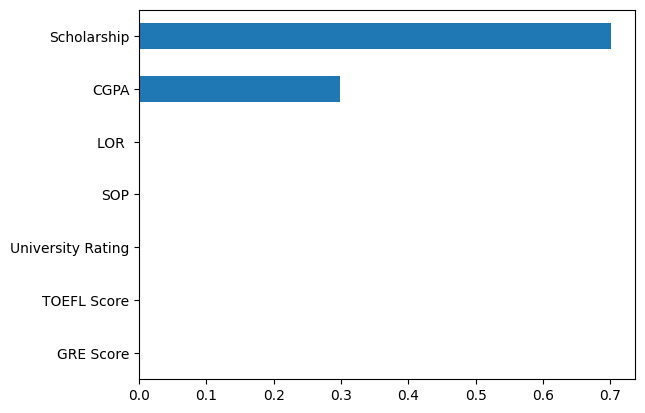

In [ ]:
feature_importance= pd.Series(tree_model.feature_importances_,index=X_train.columns).sort_values(ascending= True)
feature_importance.plot(kind='barh')

[Text(0.5, 0.875, 'Scholarship <= 0.5\nsquared_error = 0.019\nsamples = 240\nvalue = 0.732'),
 Text(0.25, 0.625, 'CGPA <= 8.015\nsquared_error = 0.01\nsamples = 162\nvalue = 0.66'),
 Text(0.125, 0.375, 'CGPA <= 7.67\nsquared_error = 0.009\nsamples = 43\nvalue = 0.552'),
 Text(0.0625, 0.125, 'squared_error = 0.006\nsamples = 15\nvalue = 0.489'),
 Text(0.1875, 0.125, 'squared_error = 0.007\nsamples = 28\nvalue = 0.586'),
 Text(0.375, 0.375, 'CGPA <= 8.51\nsquared_error = 0.005\nsamples = 119\nvalue = 0.699'),
 Text(0.3125, 0.125, 'squared_error = 0.004\nsamples = 66\nvalue = 0.672'),
 Text(0.4375, 0.125, 'squared_error = 0.003\nsamples = 53\nvalue = 0.733'),
 Text(0.75, 0.625, 'CGPA <= 9.195\nsquared_error = 0.003\nsamples = 78\nvalue = 0.881'),
 Text(0.625, 0.375, 'CGPA <= 8.845\nsquared_error = 0.001\nsamples = 37\nvalue = 0.832'),
 Text(0.5625, 0.125, 'squared_error = 0.001\nsamples = 10\nvalue = 0.79'),
 Text(0.6875, 0.125, 'squared_error = 0.001\nsamples = 27\nvalue = 0.848'),
 Text

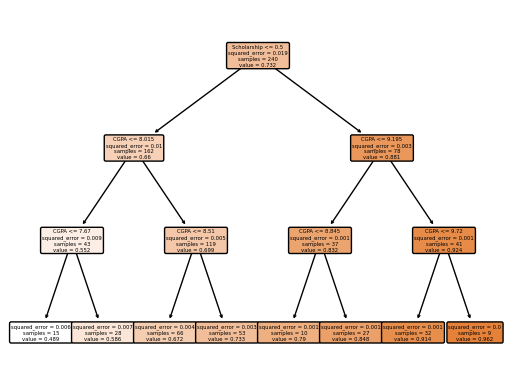

In [ ]:
#Tree Plot
plot_tree(tree_model,feature_names=X_train.columns,rounded= True, filled= True)

# **Logistic** **Regression** 

1. Model Definition

2. Model Training



In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression()
lr.fit(X_train, cy_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Logistic regression accuracy: 0.925
--------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        59
           1       0.89      0.81      0.85        21

    accuracy                           0.93        80
   macro avg       0.91      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



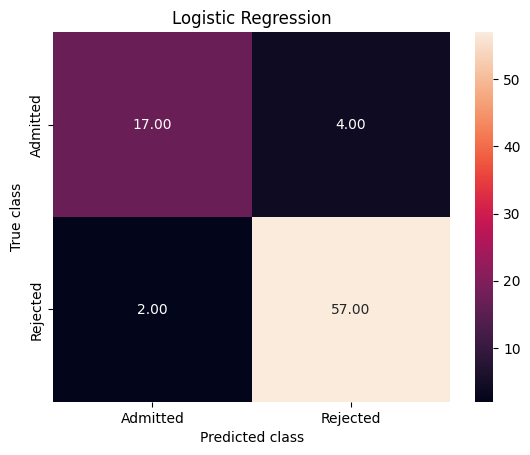

In [ ]:
from sklearn.metrics import accuracy_score
print('Logistic regression accuracy: {:.3f}'.format(accuracy_score(cy_test, lr.predict(X_test)))) 
print('--------------------------------------')
from sklearn.metrics import classification_report
print(classification_report(cy_test, lr.predict(X_test)))
cy = lr.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
lr_confm = confusion_matrix(cy_test, cy, labels=[1,0])
sns.heatmap(lr_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] ) 
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')
plt.show()

# **Comparing** **models**


 Model Evaluation

 Confusion Matrix



Random Forest Accuracy: 0.950
--------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        59
           1       0.95      0.86      0.90        21

    accuracy                           0.95        80
   macro avg       0.95      0.92      0.93        80
weighted avg       0.95      0.95      0.95        80



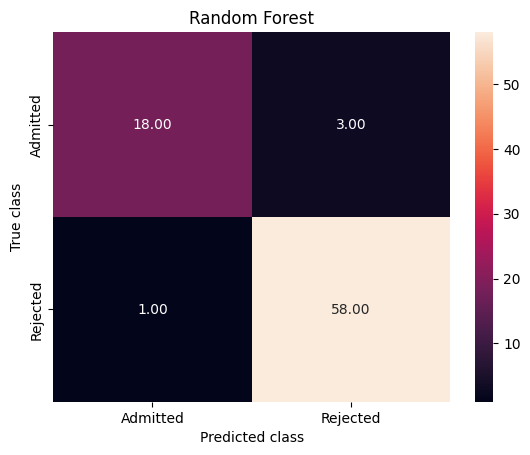

In [ ]:
# Fitting random forest model
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier()
rf.fit(X_train, cy_train)
# Printing accuracy score & confusion matrix
print('Random Forest Accuracy: {:.3f}'.format(accuracy_score(cy_test, rf.predict(X_test)))) 
print('--------------------------------------')
print(classification_report(cy_test, rf.predict(X_test)))
cy = rf.predict(X_test)
rf_confm = confusion_matrix(cy_test, cy, labels=[1,0])
sns.heatmap(rf_confm, annot=True, fmt='.2f',xticklabels = ["Admitted", "Rejected"] , yticklabels = ["Admitted", "Rejected"] ) 
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')
plt.show()

# **Conclusion** 

In this project, we analyzed a dataset called "uni_data" to predict the chance of admission for students based on various independent features. We performed data preprocessing, visualization, and implemented 3 machine learning models: Logistic regressionDecision Tree and Random Forest

In conclusion, this project showcases the potential of machine learning models in predicting admission chances for students based on their profiles. These models can assist in decision-making processes for universities and provide insights into the key factors influencing admission outcomes.